## Domain – Media
## focus – optimize selection process

In [1]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading data from file into dataframe

df=pd.read_csv(r"./datasets/voice-classification.csv")

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
## To see class distribution
df["label"].value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [7]:
## apply get dummies function for encoding
df_result = pd.get_dummies(df,drop_first=True)

In [8]:
df_result.rename(columns={"label_male":"label"},inplace=True)

In [9]:
df_result.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


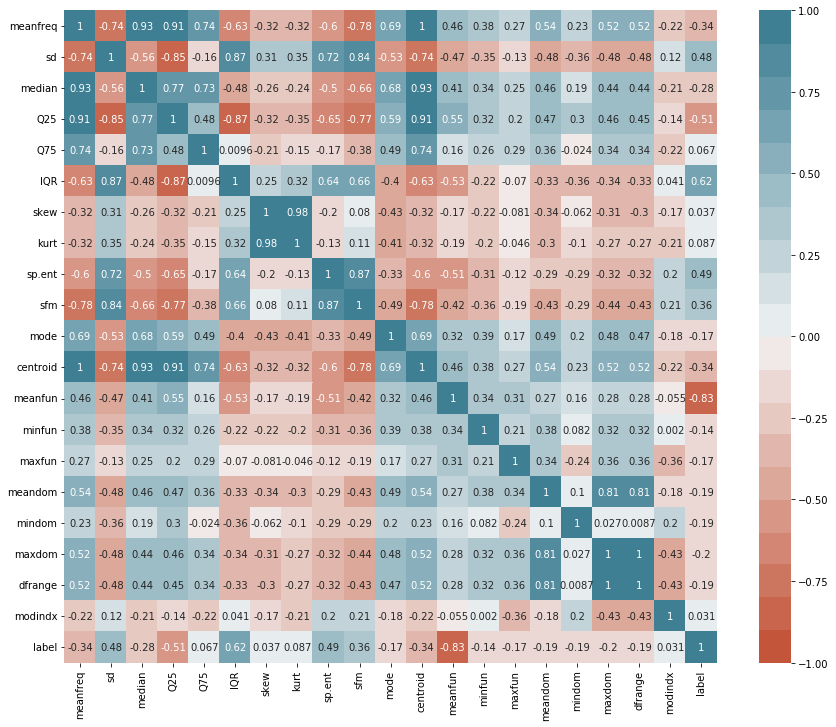

In [10]:
## Generating headmap for determining correlation
plt.figure(figsize = (15, 12))
sns.heatmap(data = df_result.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=20),
    square=True)
plt.show()

### There are lot of columns having high correlation. So only applying classification model on below columns.

In [11]:
## These columns will be used for logistic regression

x_col = ["meanfreq","sd","IQR","skew","sp.ent","sfm","mode","meandom","Q75"]

In [12]:
y_col = ["label"]

In [13]:
X = df_result[x_col]
Y = df_result[y_col]

In [14]:
Y = np.squeeze(Y)

In [15]:
## importing test train split package
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=48, stratify = Y)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2534, 9) (634, 9) (2534,) (634,)


In [18]:
## Apply SVC model

from sklearn.svm import SVC

In [19]:
svc = SVC(kernel='linear',C=1, random_state=48)

In [20]:
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=48)

In [21]:
y_pred = svc.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [23]:
print(confusion_matrix(y_true=y_test, 
                         y_pred = y_pred, 
                         labels = svc.classes_))

[[253  64]
 [  8 309]]


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       317
           1       0.83      0.97      0.90       317

    accuracy                           0.89       634
   macro avg       0.90      0.89      0.89       634
weighted avg       0.90      0.89      0.89       634



In [25]:
## Training Score
print(f"Accuracy score of Model on Training Data = {round(svc.score(X_train, y_train),3)}")

Accuracy score of Model on Training Data = 0.881


In [26]:
print(f"Accuracy score of Model on Test Data = {round(accuracy_score(y_test,y_pred),3)}")

Accuracy score of Model on Test Data = 0.886


## The model with SVC is overfitting.

### Applying Dimensionality Reduction using LDA

In [27]:
## These columns will be used for logistic regression

x_col = ["meanfreq","sd","IQR","skew","sp.ent","sfm","mode","meandom","Q75"]

In [28]:
y_col = ["label"]

In [29]:
X = df_result[x_col]
Y = df_result[y_col]

In [30]:
Y = np.squeeze(Y)

In [31]:
## Again performing Test train split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=48, stratify = Y)

In [32]:
## Apply Standardization before applying LDA transformation
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)

StandardScaler()

In [34]:
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [36]:
lda = LinearDiscriminantAnalysis(n_components = 1)

In [37]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=1)

In [38]:
## Applying LDA Transformation to both traning and test dataset
X_train = lda.transform(X_train)
X_test = lda.transform(X_test)

In [39]:
print(X_train.shape,X_test.shape)

(2534, 1) (634, 1)


In [40]:
## importing Lingreesion regressor
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression(penalty='l2',solver = 'liblinear', C=1, random_state=48, max_iter=120)

In [42]:
lr.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=120, random_state=48, solver='liblinear')

In [43]:
y_pred_lr = lr.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       317
           1       0.84      0.93      0.88       317

    accuracy                           0.88       634
   macro avg       0.88      0.88      0.88       634
weighted avg       0.88      0.88      0.88       634



In [45]:
## Training Score
print(f"Accuracy score of Model on Training Data = {round(lr.score(X_train, y_train),3)}")

Accuracy score of Model on Training Data = 0.881


In [46]:
print(f"Accuracy score of Model on Test Data = {round(accuracy_score(y_test,y_pred_lr),3)}")

Accuracy score of Model on Test Data = 0.879


## The accuracy score of models with SVC and Logistic Regression with Dimensionality reduction are having same accuracy score of 0.879.
## The modle with Logistic Regression is best model since it is not overfitting on the test dataset.
### This is the best accuracy score with given set of data